####  Convolution on 2d image

Convolutioni s one of the most important operations in signal and image processing. It could operate in 1D( e.g. speed processing) or 3D (video processing). In this post, we discuss convolution in 2D spatial which is mostly used in image processing for deature extraction and is also the core block of Convolutional Neural Network. Genenrally, we can consider an image as a matrix whose elements are numbers between 0 and 255. The size of this matrix is image height times image width times number of image channels. A grayscale image ahs 1 channel where a color image has 3 channels for an RGB. In this tutorial we aregoing to work on a grayscale image shown in feature 1 and apply different convolution kernels on it

In [48]:
from skimage import io, viewer
img = io.imread('jolie.png',as_gray = True)
print('image matrix size' , img.shape)
print('\n first 5 columns and rows of the image matrix: n')
viewer.ImageViewer(img).show()

image matrix size (1277, 1150, 4)

 first 5 columns and rows of the image matrix: n


[]

D:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


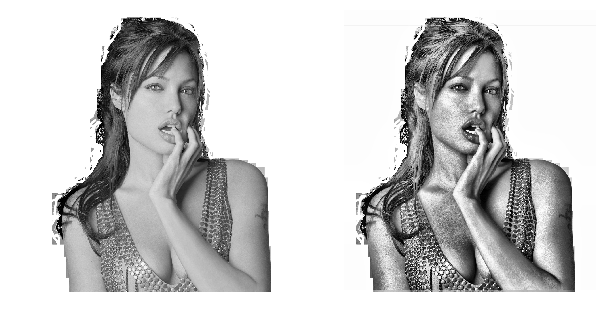

In [56]:
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
import pylab

def convolved2d(image,kernel):
    kernel = np.flipud(np.fliplr(kernel))
    output = np.zeros_like(image)
    image_padded = np.zeros((image.shape[0]+2, image.shape[1]+2))
    image_padded[1:-1,1:-1] = image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            output[y,x] = (kernel*image_padded[y:y+3, x:x+3]).sum()
    return output

img = io.imread("jolie.png")
img = color.rgb2gray(img)


image_equalized = exposure.equalize_adapthist(img/np.max(np.abs(img)), clip_limit=0.03)

fig,axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(img,cmap = plt.cm.gray); axes[0].axis("off")
axes[1].imshow(image_equalized,cmap = plt.cm.gray); axes[1].axis("off")

plt.show()




D:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
D:\Anaconda3\lib\site-packages\skimage\exposure\exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)


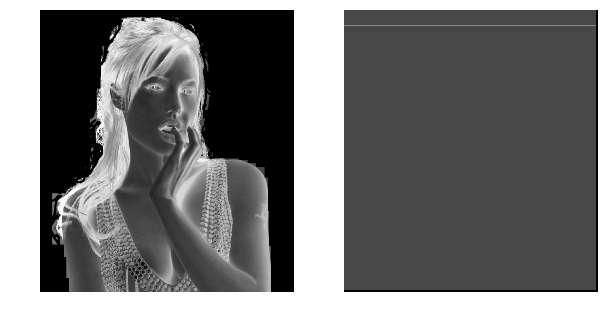

In [64]:
# convolve the sharpen kernel and the image
kernel0 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
kernel4 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

kernel1 = np.array([[-1,-1,0],[-1,0,1],[0,1,1]])
kernel2 = np.array([[-1,-1,-1],[-1,0,-1],[-1,-1,-1]])
kernel3 = np.array([[0,-1,0],[-1,0,-1],[-1,-1,-1]])

image_con = convolved2d(img, kernel2)

# Adjust the contrast of the filtered image by applying Histogram Equalization 
image_con_equalized = exposure.equalize_adapthist(image_con /np.max(np.abs(image_con)), clip_limit=0.03)

fig,axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(image_con,cmap = plt.cm.gray); axes[0].axis("off")
axes[1].imshow(image_con_equalized,cmap = plt.cm.gray); axes[1].axis("off")
plt.show()

